<a href="https://colab.research.google.com/github/xanasa14/Crypto/blob/main/Bitcoin_predictor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
!pip install bitcoin-price-api

In [57]:
from exchanges.bitfinex import Bitfinex
from exchanges.coindesk import *

Bitfinex().get_current_price()
start = '2017-01-01'
my_dict = CoinDesk().get_historical_data_as_dict(start=start, end=None)
#my_dict


In [58]:
df = pd.DataFrame(list(my_dict.items()),columns = ['Date','Price']) 
df

,Date,Price
0,2017-01-01,997.6888
1,2017-01-02,1018.05
2,2017-01-03,1030.8175
3,2017-01-04,1129.87
4,2017-01-05,1005.815
...,...,...
1620,2021-06-09,37383.66
1621,2021-06-10,36683.9167
1622,2021-06-11,37338.0367
1623,2021-06-12,35545.9817


In [59]:
comp = "BTC"
#17 
df17 = df[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2017-12-31')]
df17 = df17[['Date',"Price"]]
df17.columns = ['Date', "BTC17"] 
df17 = df17.sort_index().reset_index(drop=True)
#18
df18 = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2018-12-31')]
df18 = df18[['Date',"Price"]]
df18.columns = ['Date', "BTC18"] 
df18 = df18.sort_index().reset_index(drop=True)

#19
df19 = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-12-31')]
df19 = df19[['Date',"Price"]]
df19.columns = ['Date', "BTC19"] 
df19 = df19.sort_index().reset_index(drop=True)
#20
df20 = df[(df['Date'] >= '2020-01-01') & (df['Date'] < '2020-12-31')]
df20 = df20[['Date',"Price"]]
df20.columns = ['Date', "BTC20"] 
df20 = df20.sort_index().reset_index(drop=True)
#21
df21 = df[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2021-12-31')]
df21 = df21[['Date',"Price"]]
df21.columns = ['Date', "BTC21"] 
df21 = df21.sort_index().reset_index(drop=True)
remainingData = df21["BTC21"]
df21.columns = ['Date',comp+'21']
df21 = df21.sort_index().reset_index(drop=True)

print(remainingData.tail())
remainingData
remainingData = remainingData.sort_index().reset_index(drop=True)
remainingData
#dfLastYear = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2018-12-31')]

dfLastYear= df17[['Date']]

dfLastYear[comp+'21'] = df21[comp+'21'] 


print(len(df17))
print(len(df18))
print(len(df19))
print(len(df20))
print(len(remainingData))



159      37383.66
160    36683.9167
161    37338.0367
162    35545.9817
163    39018.0383
Name: BTC21, dtype: object
365
365
365
365
164


In [60]:

df17[comp+'17']= df17[comp+'17'].values

df17[comp+'18']= df18[comp+'18'].values
df17[comp+'19']= df19[comp+'19'].values
df17[comp+'20']= df20[comp+'20'].values
df17[comp+'21']= dfLastYear[comp+'21'].values
df17




,Date,BTC17,BTC18,BTC19,BTC20,BTC21
0,2017-01-01,997.6888,13412.44,3869.47,7188.4633,29391.775
1,2017-01-02,1018.05,14740.7563,3941.2167,6961.5683,32198.48
2,2017-01-03,1030.8175,15134.6513,3832.155,7346.58,33033.62
3,2017-01-04,1129.87,15155.2263,3863.6267,7355.855,32017.565
4,2017-01-05,1005.815,16937.1738,3835.5983,7356.3117,34035.0067
...,...,...,...,...,...,...
360,2017-12-27,15378.285,3632.68,7259.67,26445.95,NaN
361,2017-12-28,14428.76,3937.05,7313.6933,26248.2767,NaN
362,2017-12-29,14427.87,3779.7133,7397.535,27041.8667,NaN
363,2017-12-30,12629.8138,3880.9067,7234.615,27353.9783,NaN


In [61]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px


def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [64]:
dfIncludingThisYear = df17[['Date',comp+'17', comp+'18',comp+'19',comp+'20',comp+'21']]

interactive_plot(dfIncludingThisYear, "2017,2018,2019,2020,2021")

As shown in the graph above, it was in May 12 when TSLA offcially declined via Twitter any Tesla transactions with Bitcoin as it bring enviromental issues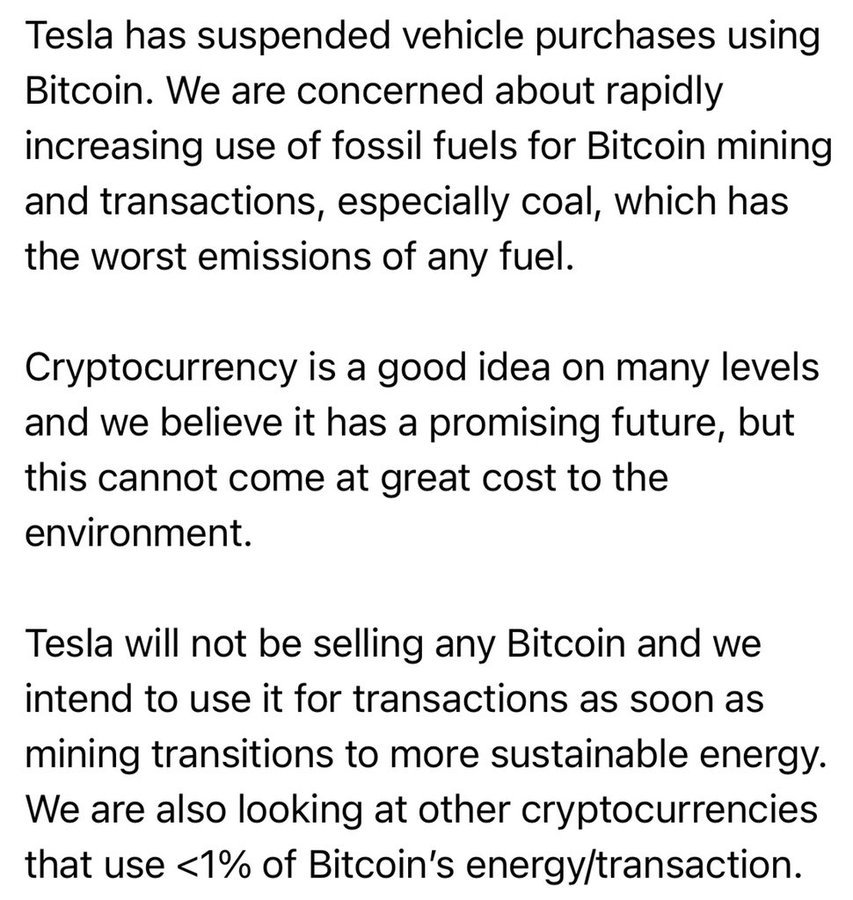 

In [63]:
dfNotIncludingThisYear = df17[['Date',comp+'17', comp+'18',comp+'19',comp+'20']]

interactive_plot(dfNotIncludingThisYear, "2017,2018,2019,2020")




In conclusion, we can reject the null hypothesis that BitCoin Prices and its volatility have any relationship with a calendar year. Furthermore, the impact of TSLA, or Elon Musk, or any big influential party can definitely directly affect BitCoin's prices